In [62]:
# Import necessary libraries
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad

# Set JAX's pseudo-random number generator
key = jax.random.PRNGKey(1337)

# Function to plot convergence in both domain and objective
def plot_convergence(domain_errors, objective_errors):
    fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))
    
    # Plot convergence in domain
    axs[0].plot(domain_errors, linewidth=3.5)
    axs[0].set_yscale('log')
    axs[0].set_xlabel('Step')
    axs[0].set_ylabel('Relative Domain Error')
    axs[0].grid(linestyle=":")
    
    # Plot convergence in objective
    axs[1].plot(objective_errors, linewidth=3.5)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Step')
    axs[1].set_ylabel('Objective Error')
    axs[1].grid(linestyle=":")
    plt.tight_layout()
    
    
    plt.show()

# Gradient descent function
def gradient_descent(init, steps, grad_func, proj=lambda x: x):
    xs = [init]
    for step in steps:
        g = grad_func(xs[-1])
        xs.append(proj(xs[-1] - step * g))
    return xs

# Least squares objective using JAX
def least_squares(A, b, x, mu=0):
    return (0.5 / A.shape[0]) * jnp.linalg.norm(jnp.dot(A, x) - b) ** 2 + mu/2*jnp.linalg.norm(x)**2

Minimum eigenvalue (in magnitude): 0.8202295
Maximum eigenvalue (in magnitude): 1.2542682
Overdetermined case. 1000x10


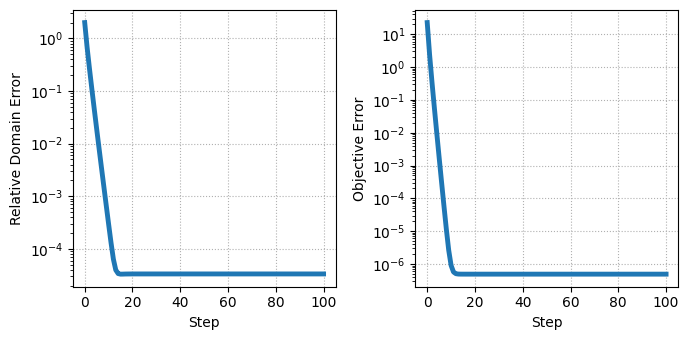

In [72]:
# Overdetermined case
m, n = 1000, 10
A = jax.random.normal(key, (m, n))
x_opt = jax.random.normal(key, (n,))
noise = jax.random.normal(key, (m,)) * 1e-3
b = jnp.dot(A, x_opt) + noise

# JAX grad for automatic differentiation
grad_least_squares = grad(lambda x: least_squares(A, b, x, mu=0))

# Perform gradient descent
x0 = 3*jax.random.normal(key, (n,))
steps = [1/1.5] * 100
xs = gradient_descent(x0, steps, grad_least_squares)

# Compute the Hessian of the function
hessian_func = jax.hessian(lambda x: least_squares(A, b, x, mu=0))

# Compute the Hessian matrix at x
H = hessian_func(x0)

# Calculate eigenvalues of the Hessian matrix
eigenvalues = jnp.linalg.eigvals(H)

min_eigenvalue = jnp.min(jnp.abs(eigenvalues))

# Find the maximum eigenvalue (in magnitude)
max_eigenvalue = jnp.max(jnp.abs(eigenvalues))

print("Minimum eigenvalue (in magnitude):", min_eigenvalue)
print("Maximum eigenvalue (in magnitude):", max_eigenvalue)


# Prepare errors for plotting
domain_errors = [jnp.linalg.norm(x - x_opt)/jnp.linalg.norm(x_opt) for x in xs]
objective_errors = [least_squares(A, b, x) for x in xs]

# Plot convergence
print(f"Overdetermined case. {m}x{n}")
plot_convergence(domain_errors, objective_errors)


Minimum eigenvalue (in magnitude): 9.516757e-09
Maximum eigenvalue (in magnitude): 118.95257
Underdetermined case. 10x1000


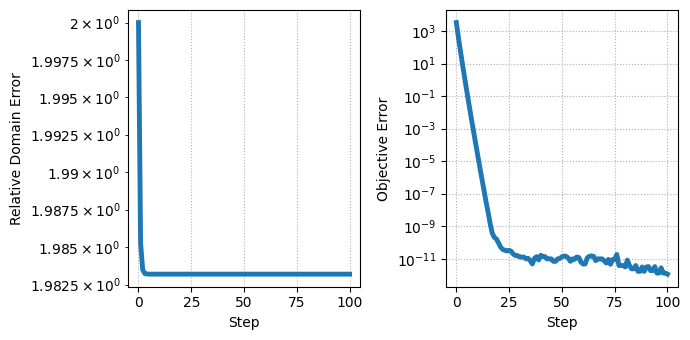

In [71]:
# Underdetermined case
m, n = 10, 1000
A = jax.random.normal(key, (m, n))
x_opt = jax.random.normal(key, (n,))
noise = jax.random.normal(key, (m,)) * 1e-3
b = jnp.dot(A, x_opt) + noise

# JAX grad for automatic differentiation
grad_least_squares = grad(lambda x: least_squares(A, b, x, mu=0))

# Perform gradient descent
x0 = 3*jax.random.normal(key, (n,))
steps = [1/150] * 100
xs = gradient_descent(x0, steps, grad_least_squares)

# Compute the Hessian of the function
hessian_func = jax.hessian(lambda x: least_squares(A, b, x, mu=0))

# Compute the Hessian matrix at x
H = hessian_func(x0)

# Calculate eigenvalues of the Hessian matrix
eigenvalues = jnp.linalg.eigvals(H)

min_eigenvalue = jnp.min(jnp.abs(eigenvalues))

# Find the maximum eigenvalue (in magnitude)
max_eigenvalue = jnp.max(jnp.abs(eigenvalues))

print("Minimum eigenvalue (in magnitude):", min_eigenvalue)
print("Maximum eigenvalue (in magnitude):", max_eigenvalue)

# Prepare errors for plotting
domain_errors = [jnp.linalg.norm(x - x_opt)/jnp.linalg.norm(x_opt) for x in xs]
objective_errors = [least_squares(A, b, x) for x in xs]

# Plot convergence
print(f"Underdetermined case. {m}x{n}")
plot_convergence(domain_errors, objective_errors)


Minimum eigenvalue (in magnitude): 0.9999864
Maximum eigenvalue (in magnitude): 119.9526
Underdetermined case. 10x1000


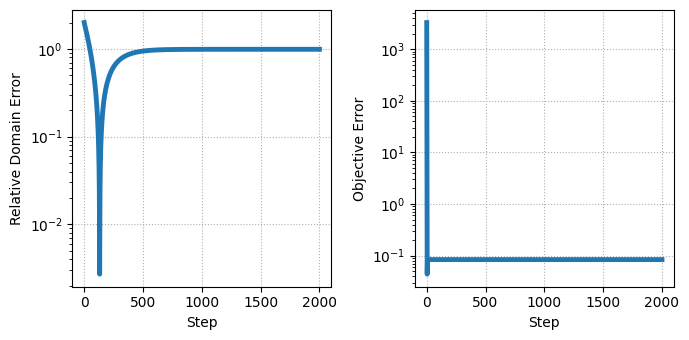

In [70]:
# Underdetermined case
m, n = 10, 1000
A = jax.random.normal(key, (m, n))
x_opt = jax.random.normal(key, (n,))
noise = jax.random.normal(key, (m,)) * 1e-5
b = jnp.dot(A, x_opt) + noise

mu = 1

# JAX grad for automatic differentiation
grad_least_squares = grad(lambda x: least_squares(A, b, x, mu=mu))

# Perform gradient descent
x0 = 3*jax.random.normal(key, (n,))
steps = [1/120] * 2000
xs = gradient_descent(x0, steps, grad_least_squares)

# Compute the Hessian of the function
hessian_func = jax.hessian(lambda x: least_squares(A, b, x, mu=mu))

# Compute the Hessian matrix at x
H = hessian_func(x0)

# Calculate eigenvalues of the Hessian matrix
eigenvalues = jnp.linalg.eigvals(H)

min_eigenvalue = jnp.min(jnp.abs(eigenvalues))

# Find the maximum eigenvalue (in magnitude)
max_eigenvalue = jnp.max(jnp.abs(eigenvalues))

print("Minimum eigenvalue (in magnitude):", min_eigenvalue)
print("Maximum eigenvalue (in magnitude):", max_eigenvalue)

# Prepare errors for plotting
domain_errors = [jnp.linalg.norm(x - x_opt)/jnp.linalg.norm(x_opt) for x in xs]
objective_errors = [least_squares(A, b, x) for x in xs]

# Plot convergence
print(f"Underdetermined case. {m}x{n}")
plot_convergence(domain_errors, objective_errors)
